# Stroke Dataset
##### Author: Chenyang Skylar Li

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CSkylarL/DataScience-MachineLearning/blob/main/data/stroke/stroke.ipynb)

# Table of Contents
1. [Introduction](#introduction)
2. [Load data](#load-data)
3. [Data information](#data-information)
4. [Data statistic description](#data-statistic-description)
5. [Data target distribution](#data-target-distribution)

## Introduction

According to the World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This `Stroke Dataset` is from Kaggle ([Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)). It is a comprehensive collection of health, demographic, and lifestyle information from a number of individuals. It is intended for use in stroke prediction research, specifically to predict whether a patient is likely to experience a stroke based on input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

The dataset includes the following information:

- **id**: Unique identifier
- **gender**: "Male", "Female", or "Other"
- **age**: Age of the patient
- **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- **ever_married**: "No" or "Yes"
- **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- **Residence_type**: "Rural" or "Urban"
- **avg_glucose_level**: Average glucose level in blood
- **bmi**: Body mass index
- **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"* 
- **stroke**: 1 if the patient had a stroke or 0 if not. This is the target variable for prediction.

Note: 
- "Unknown" in smoking_status means that the information is unavailable for this patient.
- "bmi" feature has missing values.
- The "stroke" attribute in this dataset is imbalanced, meaning the number of instances of the two classes (stroke and no-stroke) is not evenly distributed. This is a common problem in medical datasets that researchers need to take into account when training their machine learning models.

While this dataset is rich in information, it's important to note that real-world health data is often much more complex and varied. This dataset serves as an ideal starting point for developing and testing predictive models in healthcare.

## Load data


In [12]:
import pandas as pd

# Load the dataset into a Pandas dataframe
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
# Check the dataset's shape, columns, and first few rows
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Data information

Here is brief information about the dataset:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [14]:
# Check for missing values
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


## Data statistic description

Here is the statistic description of the dataset:

In [15]:
df.iloc[:, 1:].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data target distribution

Here is the target distribution of the dataset:

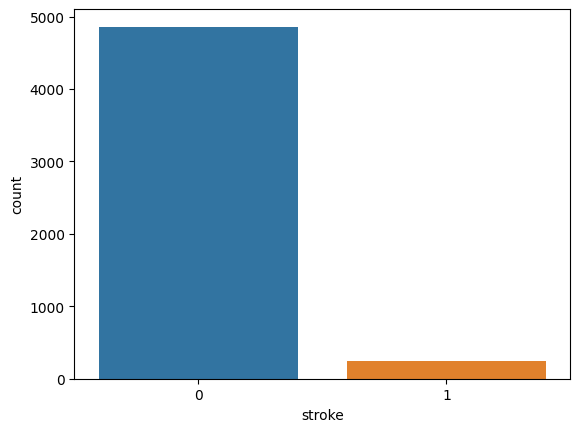

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the distribution of the target variable using a bar plot:
sns.countplot(x=df['stroke'])
plt.show()